In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

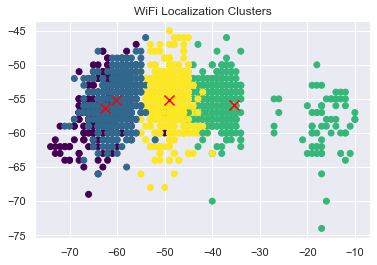

0.9545
[0.992, 0.85, 0.984, 0.992]


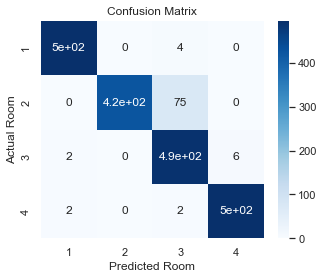

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt', delimiter='\t', header=None)

X = df.iloc[:, :7].values
y_true = df.iloc[:, -1].values

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

cluster_centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('WiFi Localization Clusters')
plt.show()

y_pred = np.zeros_like(y_true)
for i in range(4):
    mask = (kmeans.labels_ == i)
    room = np.argmax(np.bincount(y_true[mask]))
    y_pred[mask] = room
    
print(accuracy_score(y_true, y_pred))

accuracy_by_room = []
for i in range(1, 5):
    mask = (y_true == i)
    acc = accuracy_score(y_true[mask], y_pred[mask])
    accuracy_by_room.append(acc)
    
print(accuracy_by_room)

conf_mat = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(conf_mat, index=range(1, 5), columns=range(1, 5))
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Room')
plt.ylabel('Actual Room')
plt.show()

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

pca = PCA()
pca.fit(X)

variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)
cumulative_variance_ratio = np.cumsum(variance_ratio)
print(cumulative_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(n_components)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, digits.target, test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(accuracy)

print(np.shape(digits.data))
transformed = pca.transform(X)
transformed.shape


from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier



[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]
[0.14890594 0.28509365 

0.8147268777157046
Avg accuracy: 0.8191837368094352


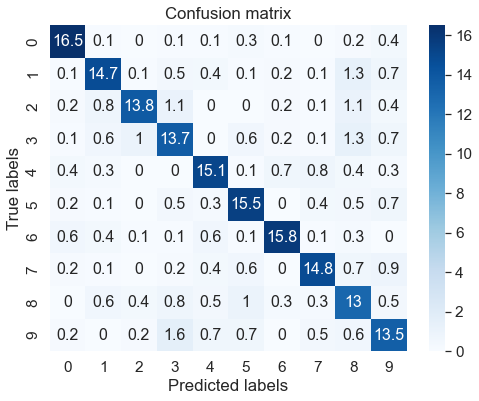

In [6]:
from sklearn.model_selection import cross_val_score

X = digits.data
y = digits.target

k = 10
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')

acc_score = []
cm_sum = np.zeros((10,10))
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    DT.fit(X_train, y_train)
    pred_values = DT.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
    cm = confusion_matrix(y_test, pred_values) 
    cm_sum += cm
     
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

result = cross_val_score(DT , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

avg_cm = cm_sum/k
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(avg_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


In [7]:
df = pd.read_csv('housing.csv')

age = df['median_house_value'].corr(df['housing_median_age'])
rooms = df['median_house_value'].corr(df['total_rooms'])
bedrooms = df['median_house_value'].corr(df['total_bedrooms'])
pop = df['median_house_value'].corr(df['population'])
income = df['median_house_value'].corr(df['median_income'])

cor = [age, rooms, bedrooms, pop, income]
print(cor)

X = df[['total_rooms', 'housing_median_age', 'median_income']]
y= df['median_house_value']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

[0.10562341249320993, 0.13415311380656303, 0.049686180247345835, -0.024649678888894883, 0.6880752079585483]
MAE: 60354.79748002079
MSE: 6538701065.948309
RMSE: 80862.23510359028
